In [1]:
import tensorflow

from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten , Dense

In [2]:
(x_train , y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
import matplotlib.pyplot as plt
import numpy as np

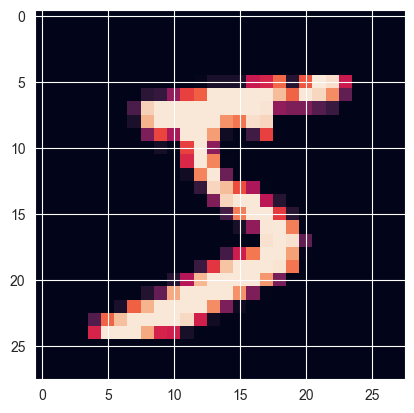

In [6]:
plt.imshow(x_train[0])

In [7]:
model = Sequential()

model.add(Flatten(input_shape = (28 , 28)))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [10]:
history = model.fit(x_train , y_train , epochs = 20 , validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.9177 - val_loss: 0.1407 - val_accuracy: 0.9602
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1201 - accuracy: 0.9645 - val_loss: 0.1292 - val_accuracy: 0.9628
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0855 - accuracy: 0.9740 - val_loss: 0.1178 - val_accuracy: 0.9625
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.1014 - val_accuracy: 0.9688
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0970 - val_accuracy: 0.9730
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9867 - val_loss: 0.0951 - val_accuracy: 0.9729
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.1014 - val_accuracy:

In [11]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis = 1)

313/313 [==============================] - 0s 866us/step


In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test ,y_pred)

0.9714

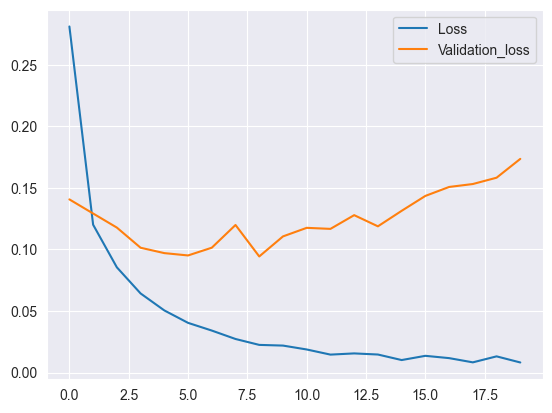

In [16]:
plt.plot(history.history['loss'] ,label = 'Loss')
plt.plot(history.history['val_loss'] , label = 'Validation_loss')
plt.legend()

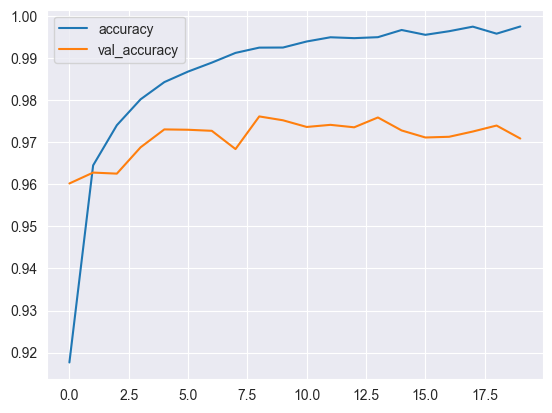

In [18]:
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val_accuracy')
plt.legend()

1/1 [==============================] - 0s 16ms/step
[6]


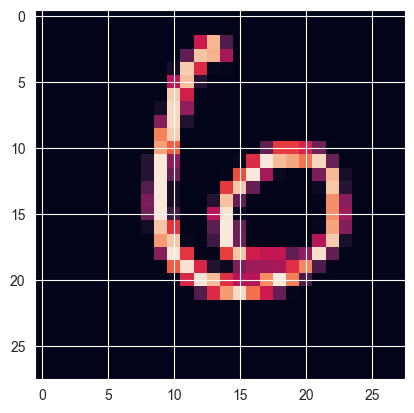

In [26]:
plt.imshow(x_test[100])
y_prob = model.predict(np.array([x_test[100]]))
y_pred = y_prob.argmax(axis = 1)
print(y_pred)
